<a href="https://colab.research.google.com/github/akshayanant/googlecolab/blob/master/MNISTCNNKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

In [0]:
# Function for training and testing the model
# After modifying the baseline code as per the project requirements

def train_test(kernal_size=3,feature_maps1=6,feature_maps2 =16,epochs=12):
  batch_size = 128
  num_classes = 10

  # input image dimensions
  img_rows, img_cols = 28, 28

  # the data, split between train and test sets
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

  if K.image_data_format() == 'channels_first':
      x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
      x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
      input_shape = (1, img_rows, img_cols)
  else:
      x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
      x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
      input_shape = (img_rows, img_cols, 1)

  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255
  print('x_train shape:', x_train.shape)
  print(x_train.shape[0], 'train samples')
  print(x_test.shape[0], 'test samples')

  # convert class vectors to binary class matrices
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)

  model = Sequential()
  model.add(Conv2D(feature_maps1, kernel_size=(kernal_size, kernal_size),
                  activation='relu',
                  input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(feature_maps1, (kernal_size, kernal_size), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(120, activation='relu'))
  model.add(Dense(84, activation='relu'))

  model.add(Dense(num_classes, activation='softmax'))

  # https://keras.io/optimizers/ 
  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adadelta(lr=0.1, rho=0.95, epsilon=None, decay=0.0),
                metrics=['accuracy'])

  hist = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=0,
            validation_data=(x_test, y_test))

  # Plotting Train and Test Accuracy v/s epoch
  plt.plot(hist.history['acc'])
  plt.plot(hist.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  #Plotting losses v/s epoch
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  print('-----------------------------------------------------------------------')

('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


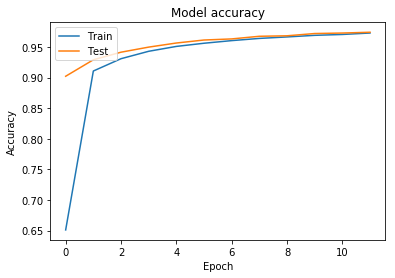

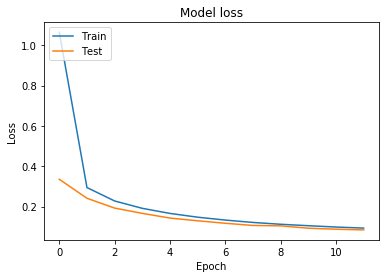

('Test loss:', 0.08388364722467959)
('Test accuracy:', 0.9741)
-----------------------------------------------------------------------
('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


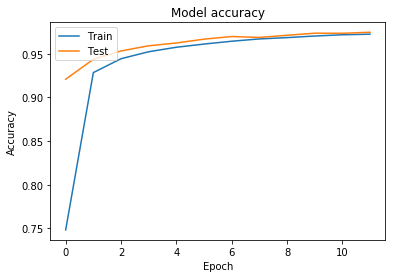

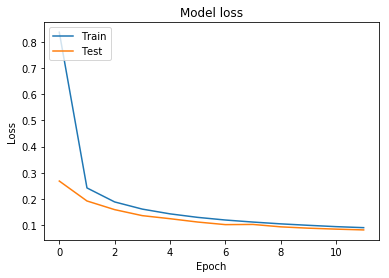

('Test loss:', 0.08101086575295777)
('Test accuracy:', 0.9746)
-----------------------------------------------------------------------
('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


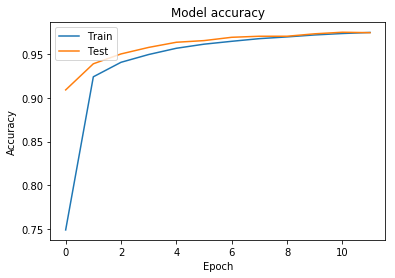

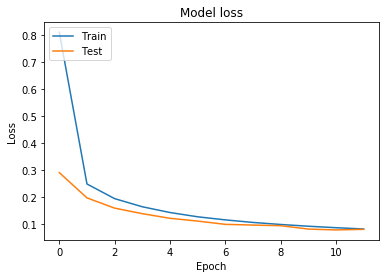

('Test loss:', 0.0796300129365176)
('Test accuracy:', 0.975)
-----------------------------------------------------------------------
('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


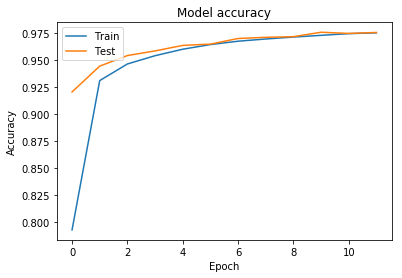

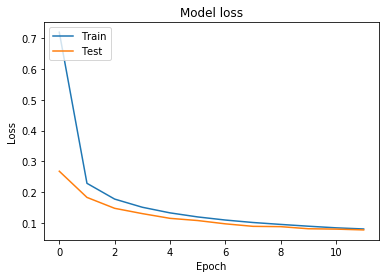

('Test loss:', 0.07688367748446763)
('Test accuracy:', 0.9757)
-----------------------------------------------------------------------


In [0]:
#kernal_size = 3X3, feature_map1 = 6, feature_map2 = 16
train_test(3,6,16,12)

#kernal_size = 5X5, feature_map1 = 6, feature_map2 = 16
train_test(5,6,16,12)

#kernal_size = 3X3, feature_map1 = 10, feature_map2 = 20
train_test(3,10,20,12)

#kernal_size = 5X5, feature_map1 = 10, feature_map2 = 20
train_test(5,10,20,12)